In [0]:
#@misc{TFDS,
#title = { {TensorFlow Datasets}, A collection of ready-to-use datasets},
#howpublished = {\url{https://www.tensorflow.org/datasets}},
#}
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
mnist_data = input_data.read_data_sets('MNIST_data',one_hot=True)
mnist_train_images = mnist_data.train.images
mnist_train_labels = mnist_data.train.labels
mnist_test_images = mnist_data.test.images
mnist_test_labels = mnist_data.test.labels
input_mnist1 = tf.placeholder(tf.float32, shape=[None, 784])
output_mnist1 = tf.placeholder(tf.float32, shape=[None, 10])

input_mnist2 = tf.placeholder(tf.float32, shape=[None, 784])
output_mnist2 = tf.placeholder(tf.float32, shape=[None, 10])
model_loss1=[]
model_loss2=[]
epochs = 100
model_acc1=[]
model_acc2=[]
train_iter = 1
weights = []
optimize=[]


Step 3464, training batch accuracy 0.4256
Step 3466, training batch accuracy 0.4258
Step 3468, training batch accuracy 0.425945
Step 3470, training batch accuracy 0.426018
Step 3472, training batch accuracy 0.426127
Step 3474, training batch accuracy 0.426291
Step 3476, training batch accuracy 0.4264
Step 3478, training batch accuracy 0.426564
Step 3480, training batch accuracy 0.426764
Step 3482, training batch accuracy 0.426909
Step 3484, training batch accuracy 0.426927
Step 3486, training batch accuracy 0.427091
Step 3488, training batch accuracy 0.427236
Step 3490, training batch accuracy 0.427418
Step 3492, training batch accuracy 0.427673
Step 3494, training batch accuracy 0.427836
Step 3496, training batch accuracy 0.428036
Step 3498, training batch accuracy 0.428218
Test accuracy: 0.4326
Saving the session successfully


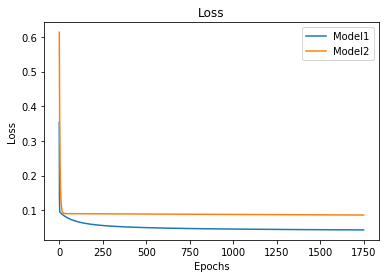

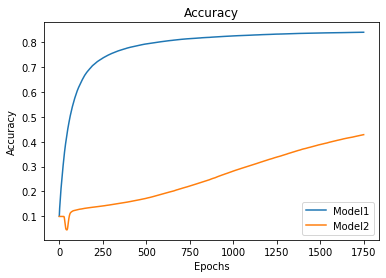

In [3]:
def dimension_reduction(weight):
  print("Inside this function:")
  pca = PCA(n_components=2)
  p_comp = pca.fit_transform(weight)
  p_df = pd.DataFrame(data = p_comp
             , columns = ['x1', 'x2'])
  plt.plot(p_df['x1'],p_df['x2'])
  plt.title('weights 2-d plotting')
  plt.xlabel('x1')
  plt.ylabel('x2')
  plt.show()

  return True

def accuracy_plotting(acc1, acc2):
  plt.plot(acc1)
  plt.plot(acc2)
  plt.legend(['Model1', 'Model2'])
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.show()

  return True

def optimization_plotting(opt1,opt2):
  plt.plot(opt1)
  plt.plot(opt2)
  plt.legend(['Model1', 'Model2'])
  plt.title('Optimization')
  plt.xlabel('Epochs')
  plt.ylabel('Optimize')
  plt.show()

  return True

def training_plotting():
  _, axes = plt.subplots(2, 4)
  images_and_labels = list(zip(mnist_train_images, mnist_train_labels))
  for ax, (image, label) in zip(axes[0:, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("Training")
  
  plt.show()
  return True

def prediction_plotting(prediction):
  _, axes = plt.subplots(2, 4)
  images_and_predictions = list(zip(mnist_train_images, prediction))
  for ax, (image, prediction) in zip(axes[0:, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title("Prediction")

  plt.show()

  return True

def loss_plotting(loss1, loss2):
  plt.plot(loss1)
  plt.plot(loss2)
  plt.legend(['Model1', 'Model2'])
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.show()

  return True

class deep_model1():
  #Model1: Defining the layers of the model, no. of nodes in each layers, 
  #and activation function 
  #First model will have 3 layers 2 hidden layers with the activation function 
  #sigmoid no. of nodes in the first layer will be
 
  def parameters(self):
    total_parameters = 0
    for variable in tf.trainable_variables():
      # shape is an array of tf.Dimension
      print(variable)
      shape = variable.get_shape()
      print(shape)
      #print(len(shape))
      variable_parameters = 1
      for dim in shape:
        #print(dim)
        variable_parameters *= dim.value
      print(variable_parameters)
      total_parameters += variable_parameters
    print(total_parameters)
    return True
  
  def model1(self):
    train_acc = []
    p_label = []
    model1_h1 = tf.layers.dense(inputs= input_mnist1, units=128, activation=tf.nn.sigmoid, name='model1_h1', reuse= None)   # hidden layer
    model1_output = tf.layers.dense(inputs=model1_h1, units=10, name='model1_output', reuse=None)  #output layer       # output layer
    self.parameters()
    
    loss = tf.losses.mean_squared_error(output_mnist1, model1_output)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
    train_op = optimizer.minimize(loss)

    sess = tf.Session()
    sess.run(tf.global_variables_initializer())
    sess.run(tf.local_variables_initializer())
    for epoch in range (3500):
      inputs, labels = mnist_data.train.next_batch(5)
      feeds = {input_mnist1: mnist_train_images, output_mnist1: mnist_train_labels}
      op,l,pred = sess.run([train_op,loss,model1_output], feed_dict=feeds)
      pred = tf.equal(tf.argmax(model1_output, 1), tf.argmax(output_mnist1, 1))
      accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))
      p_label.append(tf.cast(pred, tf.float32))
      if epoch%2 == 0:
        model_loss1.append(l)
        optimize.append(op)
        train_accuracy = accuracy.eval(session=sess, feed_dict=feeds)
        print("Step %d, training batch accuracy %g"%(epoch, train_accuracy))
        train_acc.append(train_accuracy)

    print("Test accuracy: %g"%accuracy.eval(session=sess, feed_dict={input_mnist1: mnist_test_images, output_mnist1: mnist_test_labels}))
    saver = tf.train.Saver()
    saver.save(sess, "/content/gdrive/My Drive/model1.ckpt")
    print("prediction label is here:", p_label)
    return model_loss1, train_acc, saver, p_label

class deep_model2():
  def parameters(self):
    total_parameters = 0
    for variable in tf.trainable_variables():
      # shape is an array of tf.Dimension
      print(variable)
      shape = variable.get_shape()
      print(shape)
      #print(len(shape))
      variable_parameters = 1
      for dim in shape:
        #print(dim)
        variable_parameters *= dim.value
      print(variable_parameters)
      total_parameters += variable_parameters
    print(total_parameters)
    return True

  def model2(self):
    train_acc = []
    p_label = []
    model2_h1 = tf.layers.dense(inputs= input_mnist2, units=107, activation=tf.nn.sigmoid, name='model2_h1', reuse=None)# hidden layer
    model2_h2 = tf.layers.dense(inputs= model2_h1, units=64, activation=tf.nn.sigmoid, name='model2_h2', reuse=None)    # hidden layer
    model2_h3 = tf.layers.dense(inputs= model2_h2, units=16, activation=tf.nn.sigmoid, name='model2_h3', reuse=None)    # hidden layer
    model2_output = tf.layers.dense(inputs=model2_h3, units=10, name='model2_output', reuse=None)                       # output layer
    self.parameters()
    loss = tf.losses.mean_squared_error(output_mnist2, model2_output)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.05)
    train_op = optimizer.minimize(loss)
    sess2 = tf.Session()
    sess2.run(tf.global_variables_initializer())
    sess2.run(tf.local_variables_initializer())

    for epoch in range (3500):
      #train and net output
      inputs, labels = mnist_data.train.next_batch(5)
      feeds = {input_mnist2: mnist_train_images, output_mnist2: mnist_train_labels}
      op,l,pred = sess2.run([train_op,loss,model2_output], feed_dict=feeds)
      pred = tf.equal(tf.argmax(model2_output, 1), tf.argmax(output_mnist2, 1))
      accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))
      p_label.append(tf.cast(pred, tf.float32))

      #printing batch accuracy after every 100 epochs
      if epoch%2 == 0:
        model_loss2.append(l)
        optimize.append(op)
        train_accuracy = accuracy.eval(session=sess2, feed_dict=feeds)
        print("Step %d, training batch accuracy %g"%(epoch, train_accuracy))
        train_acc.append(train_accuracy)
    print("Test accuracy: %g"%accuracy.eval(session=sess2, feed_dict={input_mnist2: mnist_test_images, output_mnist2: mnist_test_labels}))
    saver = tf.train.Saver()
    saver.save(sess2, "/content/gdrive/My Drive/model2.ckpt")
    
    return model_loss2,train_acc, saver,p_label

def main():
  
  dp1 = deep_model1()
  dp2 = deep_model2()

  #training the model for 8 times
  for iter in range (train_iter):
    loss_value_1, train_acc1, saved_sess1, pred1 = dp1.model1()
    loss_value_2, train_acc2, saved_sess2, pred2 = dp2.model2()
    if iter%3 == 0:
      print("Saving the session successfully")#all the weights are stored
      model1_weights_h1 = tf.get_collection(key = tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'model1_h1/kernel:0')
      model1_weights_output = tf.get_collection(key = tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'model1_output/kernel:0')
      model2_weights_h1 = tf.get_collection(key = tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'model2_h1/kernel:0')
      model2_weights_h2 = tf.get_collection(key = tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'model2_h2/kernel:0')
      model2_weights_h3 = tf.get_collection(key = tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'model2_h3/kernel:0')
      model2_weights_output = tf.get_collection(key = tf.GraphKeys.TRAINABLE_VARIABLES, scope = 'model2_output/kernel:0')
      #get the weights from the sessions
  loss_plotting(loss_value_1,loss_value_2)
  accuracy_plotting(train_acc1,train_acc2)
  #For prediction plot of model1
  #training_plotting()
  #prediction_plotting(pred1)
  #For Prediction plot of model2
  #prediction_plotting(pred2)
  #loss_value_2 = dp2.model2()
  #loss_plotting(loss_value_1, loss_value_2)

if __name__ =="__main__":
  main()